In [1]:
#numeric python module, useful for handling large data arrays
import numpy as np

import pandas as pd

#module for dealing with netCDF files (all sat files are netCDF)
import netCDF4 as nc

#modules for making plots. Here wer are importing the full matplotlib
#module, but also the sub-module pyplot separately with an abbreviated
#name so it is easier to use in the code
import matplotlib.pyplot as plt
import matplotlib

#panda
import pandas as pd


#import datetime
import datetime
from datetime import datetime

#for displaying the plots in this notebook 
%matplotlib inline

#module for making maps
from mpl_toolkits.basemap import Basemap

#miscellaneous operating system interfaces module for doing things like
#moving file, exploring directory paths, etc..
import os
import re

##import the FFT module
from numpy import fft

In [2]:
##this is just calculating the monthly averages again
#specify the directory where all the files are saved
cdom_giopdir= '/Users/clarabirdferrer/Documents/Bigelow/SatelliteData/CDOM/subsets/giop'

#list all the files in the directory using the os module
cdom_giop_all=os.listdir(cdom_giopdir)

wd = os.chdir(cdom_giopdir)
cwd = os.getcwd()
#print (cwd)


#pull just the files that are data not lat or lon
datafiles=[]
for ff in cdom_giop_all:
    M = re.search('_data_',ff)
    if M:
        datafiles += [ff]


##this loop calculates the average across the GoM for each month
#number of files
numfiles = len(datafiles)
       
#looping through each file, doing as detailed in the above 
#section for subsetting data

cdomgiop_avg = []

x = []
for yr in range(2003,2017):  
    fn = 'adg443.giop_subset_data_'+ str(yr)
    
    for mn in range (1,13):
        fnm = fn + '_' + str(mn)
        #print (fnm) ##this gives all the files names
            
        #data = open(fnm,'r')
        data = np.loadtxt(fnm)
        #data = np.genfromtxt(fnm)
        #print (data)              ##here is where it goes to only the 12th month

        data_=np.array(data).astype(np.float)
        #print (data_)

        ma = np.ma.MaskedArray(data,mask=np.isnan(data_))
        #print (ma)

        avg = np.nanmean(ma)
        #print (avg)
       


        cdomgiop_avg += [avg]
        #print(cdomgiop_avg)

        #this is creating the dates for the x axis of the time series
        time = str(mn) + '_' + str(yr)
        date = datetime.strptime(time, '%m_%Y')
        x.append(date)

        #print(cdomgiop_avg)

            A                                        B
0    0.000000                     (0.0861176181701+0j)
1    0.785714    (0.00299857836797+0.000740234953274j)
2    1.571429     (0.00076714045881+0.00223743274729j)
3    2.357143    (-0.00123479150895+0.00284020981145j)
4    3.142857   (0.000945735472382+0.000515350181765j)
5    3.928571  (-1.41425533691e-05+0.000412463549368j)
6    4.714286   (-0.000331841134148+0.00144642673415j)
7    5.500000    (3.75049780252e-05+0.00075037498384j)
8    6.285714   (0.000671912269447-3.84459076363e-05j)
9    7.071429  (-0.000790769924921+0.000678380320239j)
10   7.857143    (0.00028276372847+4.30679417912e-05j)
11   8.642857   (0.000179295549871-0.000522716213209j)
12   9.428571  (-0.000234194418117-0.000504261418625j)
13  10.214286    (0.000275179289669+0.00454379450019j)
14  11.000000     (0.00107505583597-0.00604922785375j)
15  11.785714    (0.00024084515546-0.000513769260009j)
16  12.571429     (-0.00118056650856+0.0018329696615j)
17  13.357

[]

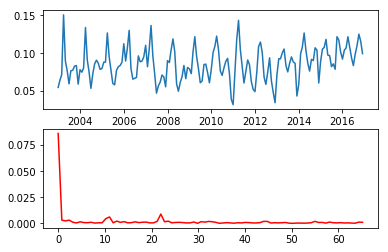

In [3]:
Fs= 132  #sampling rate ##1 data point per month but maybe should be 12 (in R it would be b/c 12 months per year)
Ts = 1 #the hell is a sampling interval
t = x #time vector

y = cdomgiop_avg      #signal
n = len(y) #length of signal

k=np.arange(n) #returns evenly spaced values w/in given interval
T= n/Fs #length of signal/sampling frequency

frq = k/T #two sides of frequency range
frq = frq[range(n//2)]   #one side frequency range


Y=np.fft.fft(y)/n  ##fft computing and normalization
Y = Y[range(n//2)]

d = {'B':Y,'A':frq}
df = pd.DataFrame(data=d)
print(df)


fig,ax = plt.subplots(2,1)
ax[0].plot(t,y) #CDOM avg time series
ax[1].plot(frq,abs(Y),'r') #plotting the spectrum
plt.plot()



[   0.    1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.
   12.   13.   14.   15.   16.   17.   18.   19.   20.   21.   22.   23.
   24.   25.   26.   27.   28.   29.   30.   31.   32.   33.   34.   35.
   36.   37.   38.   39.   40.   41.   42.   43.   44.   45.   46.   47.
   48.   49.   50.   51.   52.   53.   54.   55.   56.   57.   58.   59.
   60.   61.   62.   63.   64.   65.   66.   67.   68.   69.   70.   71.
   72.   73.   74.   75.   76.   77.   78.   79.   80.   81.   82.   83.
   84.   85.   86.   87.   88.   89.   90.   91.   92.   93.   94.   95.
   96.   97.   98.   99.  100.  101.  102.  103.  104.  105.  106.  107.
  108.  109.  110.  111.  112.  113.  114.  115.  116.  117.  118.  119.
  120.  121.  122.  123.  124.  125.  126.  127.  128.  129.  130.  131.
  132.  133.  134.  135.  136.  137.  138.  139.  140.  141.  142.  143.
  144.  145.  146.  147.  148.  149.]


NameError: name 'py' is not defined

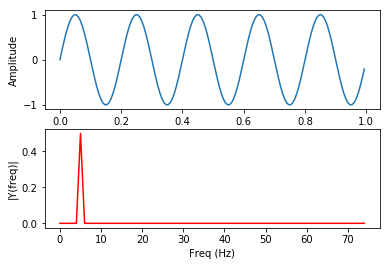

In [4]:


Fs = 150.0;  # sampling rate
Ts = 1.0/Fs; # sampling interval
t = np.arange(0,1,Ts) # time vector

ff = 5;   # frequency of the signal
y = np.sin(2*np.pi*ff*t)

n = len(y) # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/T # two sides frequency range
print(frq)
frq = frq[range(n//2)] # one side frequency range

Y = np.fft.fft(y)/n # fft computing and normalization
Y = Y[range(n//2)]

fig, ax = plt.subplots(2, 1)
ax[0].plot(t,y)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].plot(frq,abs(Y),'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')

plot_url = py.plot_mpl(fig, filename='mpl-basic-fft')